In [2]:
import gensim.downloader as api

info_datasets = api.info()
# print(info_datasets)
dataset_info = api.info("text8")
dataset = api.load("text8")
word2vec_model = api.load('glove-wiki-gigaword-50')
print("Model loaded successfully!")


Model loaded successfully!


In [3]:
word = "programmer"
similar_words = word2vec_model.most_similar(word)

print(f"Words similar to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")
    

Words similar to 'programmer':
programmers: 0.7017
software: 0.6866
computer: 0.6684
prodigy: 0.6525
animator: 0.6484
entrepreneur: 0.6384
technician: 0.6365
inventor: 0.6290
hacker: 0.6149
programming: 0.6057


In [4]:
word = "hello"
similar_words = word2vec_model.most_similar(word)

print(f"Words similar to '{word}':")
for similar_word, similarity in similar_words:
    print(f"{similar_word}: {similarity:.4f}")

Words similar to 'hello':
goodbye: 0.8538
hey: 0.8074
!: 0.7951
kiss: 0.7892
wow: 0.7641
daddy: 0.7346
mama: 0.7340
bitch: 0.6983
dear: 0.6975
cry: 0.6963


✅ Gender Axis constructed!


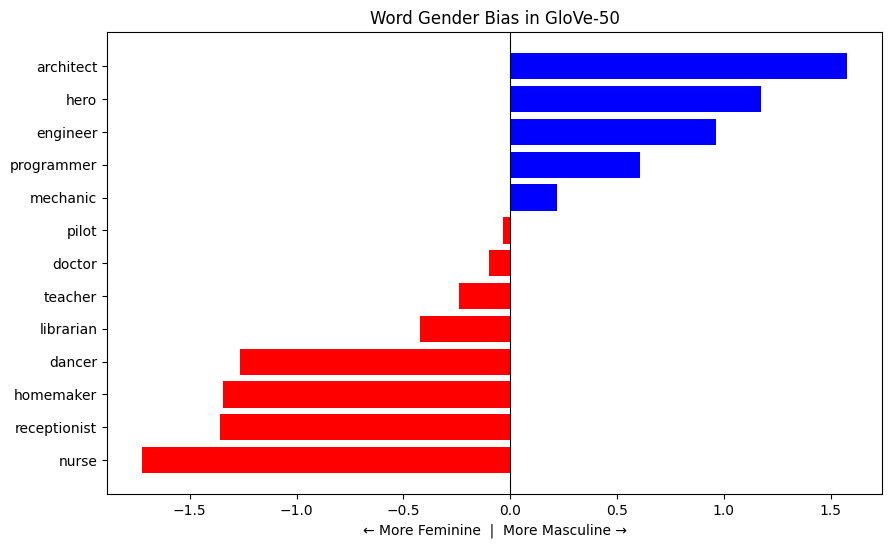

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Define Gender Pairs to construct the axis
# We take the difference: (He - She)
gender_pairs = [
    ('man', 'woman'),
    ('he', 'she'),
    ('king', 'queen'),
    ('brother', 'sister'),
    ('father', 'mother')
]

# 2. Calculate the "Gender Direction" Vector
# We average the differences to get a robust axis
gender_direction = np.zeros(word2vec_model.vector_size)

for male, female in gender_pairs:
    diff = word2vec_model[male] - word2vec_model[female]
    gender_direction += diff

# Normalize the vector (make length = 1)
gender_direction /= len(gender_pairs)
# This is usually done with L2 norm for cosine similarity
from numpy.linalg import norm
gender_direction = gender_direction / norm(gender_direction)

print("✅ Gender Axis constructed!")

# 3. Define words to map
words_to_map = [
    'programmer', 'nurse', 'engineer', 'teacher', 'doctor', 
    'homemaker', 'architect', 'dancer', 'mechanic', 'librarian',
    'hero', 'pilot', 'receptionist'
]

# 4. Project words onto the axis
# Projection = Dot Product of (WordVector . GenderAxis)
projections = []
for w in words_to_map:
    # Get vector
    vec = word2vec_model[w]
    # Calculate scalar projection (how much it aligns with the axis)
    # Positive = More "Male", Negative = More "Female"
    score = np.dot(vec, gender_direction)
    projections.append((w, score))

# Sort by score for better plotting
projections.sort(key=lambda x: x[1])

# 5. Visualize it
names, values = zip(*projections)

plt.figure(figsize=(10, 6))
colors = ['red' if v < 0 else 'blue' for v in values]
plt.barh(names, values, color=colors)
plt.axvline(0, color='black', linewidth=0.8) # The neutral line
plt.title("Word Gender Bias in GloVe-50")
plt.xlabel("← More Feminine  |  More Masculine →")
plt.show()

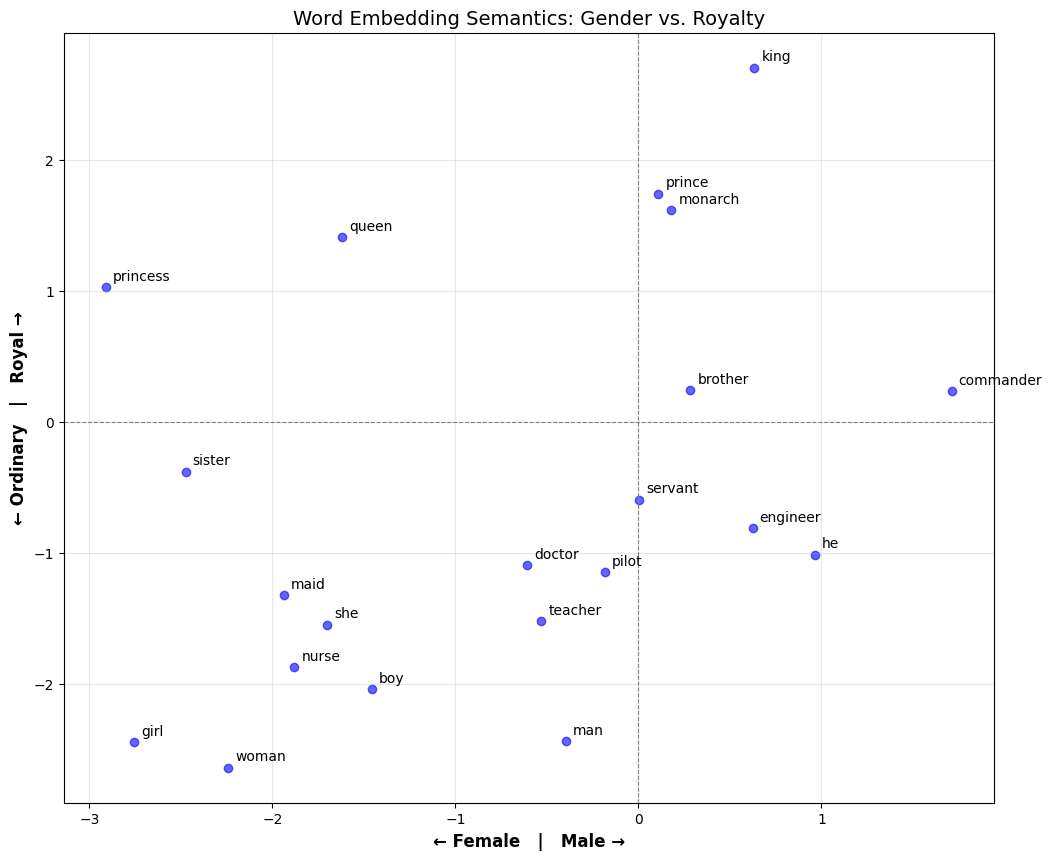

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the 2 Axes (The "Parameters")
# X-Axis: Gender (Male vs Female)
gender_axis = word2vec_model['he'] - word2vec_model['she']
# Y-Axis: Royalty (Ordinary vs Royal)
royalty_axis = word2vec_model['king'] - word2vec_model['man']

# 2. Define the words we want to map
words_to_plot = [
    # Gendered pairs
    'man', 'woman', 'boy', 'girl',
    'he', 'she', 'brother', 'sister',
    
    # Royal words
    'king', 'queen', 'prince', 'princess',
    'monarch',
    
    # Neutral/Mixed words (Let's see where they fall!)
    'teacher', 'doctor', 'nurse', 'engineer', 'pilot',
    'servant', 'maid', 'commander'
]

# 3. Calculate Coordinates (Projecting 50D -> 2D)
x_coords = []
y_coords = []

for word in words_to_plot:
    vec = word2vec_model[word]
    
    # Project onto X (Gender)
    x = np.dot(vec, gender_axis) / np.linalg.norm(gender_axis)
    
    # Project onto Y (Royalty)
    y = np.dot(vec, royalty_axis) / np.linalg.norm(royalty_axis)
    
    x_coords.append(x)
    y_coords.append(y)

# 4. Plot the Map
plt.figure(figsize=(12, 10))
plt.scatter(x_coords, y_coords, c='blue', alpha=0.6)

# Add the grid lines for the origin
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.axvline(0, color='grey', linewidth=0.8, linestyle='--')

# Label the axes
plt.xlabel("← Female   |   Male →", fontsize=12, fontweight='bold')
plt.ylabel("← Ordinary   |   Royal →", fontsize=12, fontweight='bold')
plt.title("Word Embedding Semantics: Gender vs. Royalty", fontsize=14)

# Label the dots
for i, word in enumerate(words_to_plot):
    plt.annotate(word, (x_coords[i], y_coords[i]), 
                 xytext=(5, 5), textcoords='offset points')

plt.grid(True, alpha=0.3)
plt.show()


✅ Robust Axes Constructed using Ensemble Averaging!


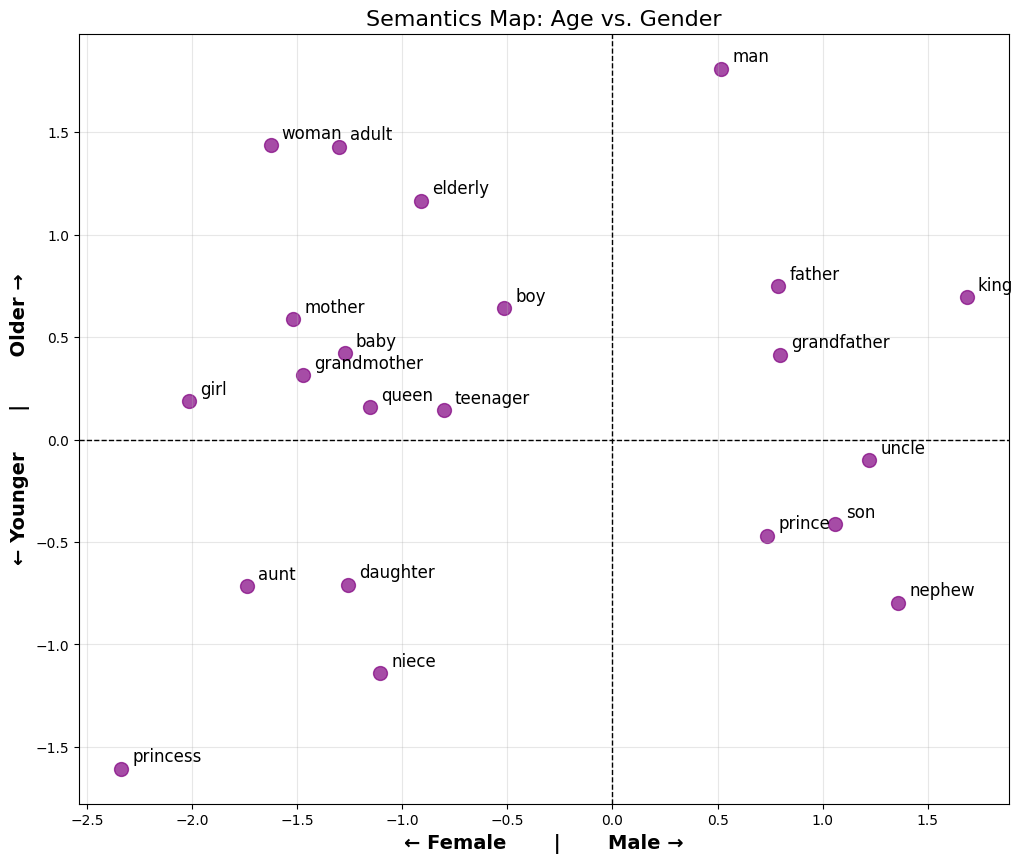

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 1. Define the Axes
# 1. Construct a Robust Age Axis (The "Ensemble")
# We use many pairs to average out the noise
age_pairs = [
    ('man', 'boy'),
    ('woman', 'girl'),
    ('father', 'son'),
    ('mother', 'daughter'),
    ('grandfather', 'grandson'),
    ('grandmother', 'granddaughter'),
    ('king', 'prince'),
    ('queen', 'princess')
]

# Start with zero vector
age_axis = np.zeros(word2vec_model.vector_size)

# Add up all the differences
for elder, youth in age_pairs:
    age_axis += word2vec_model[elder] - word2vec_model[youth]

# Normalize
age_axis /= np.linalg.norm(age_axis)


# 2. Construct a Robust Gender Axis (Same technique)
gender_pairs = [
    ('man', 'woman'),
    ('king', 'queen'),
    ('brother', 'sister'),
    ('father', 'mother'),
    ('uncle', 'aunt'),
    ('actor', 'actress')
]

gender_axis = np.zeros(word2vec_model.vector_size)
for male, female in gender_pairs:
    gender_axis += word2vec_model[male] - word2vec_model[female]

gender_axis /= np.linalg.norm(gender_axis)

print("✅ Robust Axes Constructed using Ensemble Averaging!")
# ... now run the plotting loop again ...

# 2. Words to Plot
words_to_plot = [
    # The Corners
    'boy', 'girl', 'man', 'woman',
    'grandfather', 'grandmother', 
    
    # Royalty (Age/Gender Check)
    'king', 'queen', 'prince', 'princess',
    
    # Family terms
    'father', 'mother', 'son', 'daughter',
    'uncle', 'aunt', 'niece', 'nephew',
    
    # Generic age terms
    'baby', 'teenager', 'adult', 'elderly'
]

# 3. Calculate Coordinates
x_coords = []
y_coords = []

for word in words_to_plot:
    if word in word2vec_model:
        vec = word2vec_model[word]
        # Project onto dimensions
        x = np.dot(vec, gender_axis)
        y = np.dot(vec, age_axis)
        x_coords.append(x)
        y_coords.append(y)

# 4. Plot
plt.figure(figsize=(12, 10))
plt.scatter(x_coords, y_coords, c='purple', alpha=0.7, s=100)

# Add Axes Lines
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')

# Labels
plt.xlabel("← Female       |       Male →", fontsize=14, fontweight='bold')
plt.ylabel("← Younger      |       Older →", fontsize=14, fontweight='bold')
plt.title("Semantics Map: Age vs. Gender", fontsize=16)

# Add word labels
for i, word in enumerate(words_to_plot):
    plt.annotate(word, (x_coords[i], y_coords[i]), 
                 xytext=(8, 5), textcoords='offset points', fontsize=12)

plt.grid(True, alpha=0.3)
plt.show()

✅ Robust Axes Constructed!


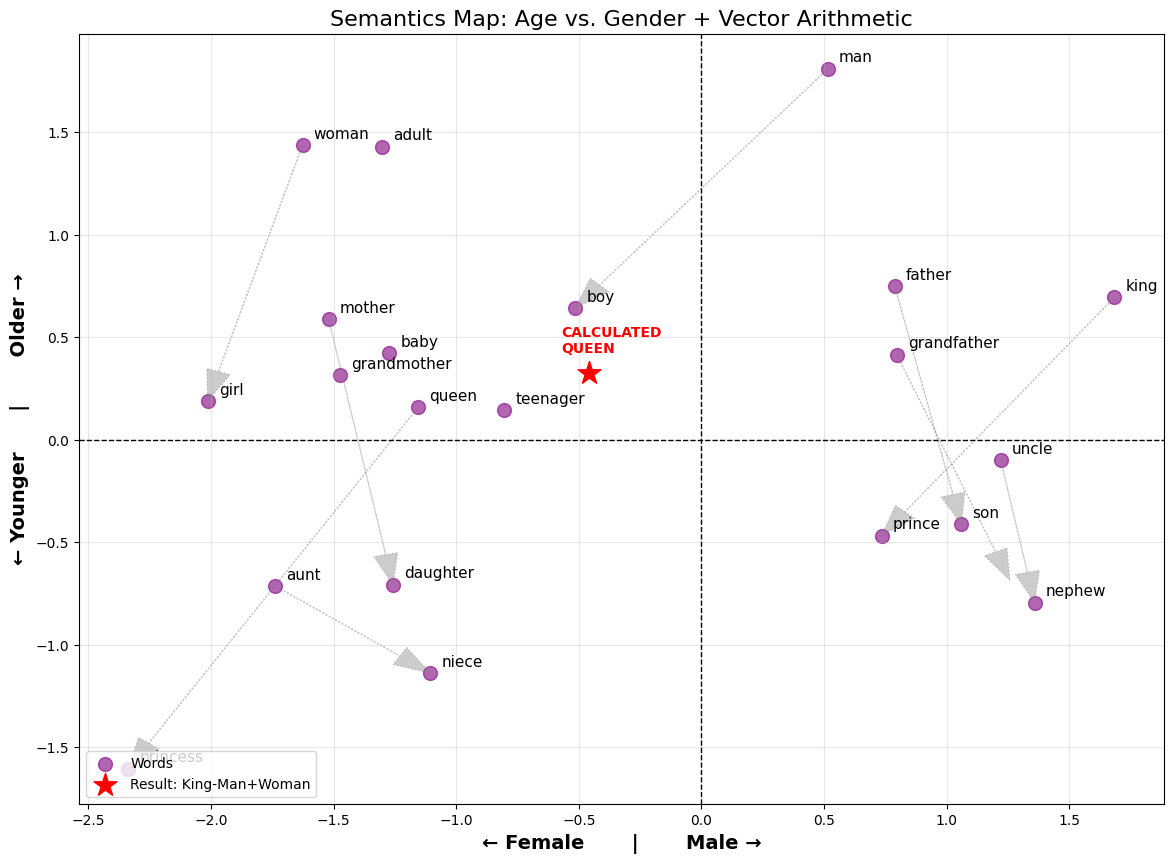

In [11]:
age_pairs = [
    ('man', 'boy'),
    ('woman', 'girl'),
    ('father', 'son'),
    ('mother', 'daughter'),
    ('grandfather', 'grandson'),
    ('grandmother', 'granddaughter'),
    ('king', 'prince'),
    ('queen', 'princess')
]

age_axis = np.zeros(word2vec_model.vector_size)
for elder, youth in age_pairs:
    diff = word2vec_model[elder] - word2vec_model[youth]
    age_axis += diff
age_axis /= np.linalg.norm(age_axis)  # Normalize

# B. Gender Axis (Male - Female)
gender_pairs = [
    ('man', 'woman'),
    ('king', 'queen'),
    ('brother', 'sister'),
    ('father', 'mother'),
    ('uncle', 'aunt'),
    ('actor', 'actress')
]

gender_axis = np.zeros(word2vec_model.vector_size)
for male, female in gender_pairs:
    diff = word2vec_model[male] - word2vec_model[female]
    gender_axis += diff
gender_axis /= np.linalg.norm(gender_axis)  # Normalize

print("✅ Robust Axes Constructed!")

# ==========================================
# 3. DEFINE WORDS TO PLOT
# ==========================================
words_to_plot = [
    # The Corners
    'boy', 'girl', 'man', 'woman',
    'grandfather', 'grandmother',
    
    # Royalty
    'king', 'queen', 'prince', 'princess',
    
    # Family
    'father', 'mother', 'son', 'daughter',
    'uncle', 'aunt', 'nephew', 'niece',
    
    # Generic
    'baby', 'teenager', 'adult'
]

# ==========================================
# 4. CALCULATE COORDINATES & GHOST VECTOR
# ==========================================
x_coords = []
y_coords = []

# Project regular words
for word in words_to_plot:
    vec = word2vec_model[word]
    x = np.dot(vec, gender_axis)
    y = np.dot(vec, age_axis)
    x_coords.append(x)
    y_coords.append(y)

# Calculate "Ghost Queen" (The Math Test)
# Equation: King - Man + Woman = ?
ghost_vec = word2vec_model['king'] - word2vec_model['man'] + word2vec_model['woman']
ghost_x = np.dot(ghost_vec, gender_axis)
ghost_y = np.dot(ghost_vec, age_axis)

# ==========================================
# 5. PLOTTING
# ==========================================
plt.figure(figsize=(14, 10))

# Plot the main dots
plt.scatter(x_coords, y_coords, c='purple', alpha=0.6, s=100, label='Words')

# Plot the "Ghost Queen"
plt.scatter(ghost_x, ghost_y, c='red', marker='*', s=300, label='Result: King-Man+Woman')
plt.annotate("CALCULATED\nQUEEN", (ghost_x, ghost_y), 
             xytext=(-20, 15), textcoords='offset points', 
             color='red', fontweight='bold')

# Add Grid Lines (Origin)
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')

# Labels
plt.xlabel("← Female       |       Male →", fontsize=14, fontweight='bold')
plt.ylabel("← Younger      |       Older →", fontsize=14, fontweight='bold')
plt.title("Semantics Map: Age vs. Gender + Vector Arithmetic", fontsize=16)

# Annotate words
for i, word in enumerate(words_to_plot):
    plt.annotate(word, (x_coords[i], y_coords[i]), 
                 xytext=(8, 5), textcoords='offset points', fontsize=11)

# ==========================================
# 6. DRAW RELATIONSHIP ARROWS
# ==========================================
arrows = [
    ('father', 'son'),
    ('mother', 'daughter'),
    ('grandfather', 'grandson'),
    ('king', 'prince'),
    ('queen', 'princess'),
    ('uncle', 'nephew'),
    ('aunt', 'niece'),
    ('man', 'boy'),
    ('woman', 'girl')
]

for elder, younger in arrows:
    e_vec = word2vec_model[elder]
    y_vec = word2vec_model[younger]
    
    # Get coords
    ex, ey = np.dot(e_vec, gender_axis), np.dot(e_vec, age_axis)
    yx, yy = np.dot(y_vec, gender_axis), np.dot(y_vec, age_axis)
    
    # Draw Arrow
    plt.arrow(ex, ey, (yx - ex), (yy - ey), 
              head_width=0.1, head_length=0.15, fc='gray', ec='gray', 
              alpha=0.4, linestyle=':', length_includes_head=True)

plt.legend(loc='lower left')
plt.grid(True, alpha=0.3)
plt.show()